In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import requests 
from StringIO import StringIO
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 
import datetime as dt # module for manipulating dates and times
import numpy.linalg as lin # module for performing linear algebra operations
import collections

# special matplotlib argument for improved plots
from matplotlib import rcParams
import seaborn as sns

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (20, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

/Users/Apple/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,ID,timestamp,Stock_ID,Volume,Three_Day_Moving_Average,Five_Day_Moving_Average,Ten_Day_Moving_Average,Twenty_Day_Moving_Average,True_Range,Average_True_Range,Positive_Directional_Movement,Negative_Directional_Movement,Outcome
0,1_1,1,1,-0.33308,-0.99681,-0.98736,-0.94728,-0.91977,-0.21129,-0.38778,-0.39903,-0.14321,1
1,3_1,1,3,-0.67096,-2.08895,-2.08251,-2.02183,-1.93779,-0.46476,0.97308,-0.31078,0.80286,0
2,4_1,1,4,-0.22040,1.07839,1.09143,1.18737,NaN,-0.51638,-0.52368,-0.24140,-0.31910,0
3,6_1,1,6,-0.23118,-0.55106,-0.53976,-0.47569,-0.42449,-0.60816,-0.69311,-0.40673,-0.45965,0
4,10_1,1,10,0.15076,-1.40937,-1.39805,-1.36756,-1.31365,-0.33206,-0.43690,-0.33347,0.29217,0


In [6]:
len(train['Stock_ID'].unique())

1955

In [8]:
train.shape

(702739, 13)

In [10]:
train['Outcome'].value_counts()

0    384456
1    318283
Name: Outcome, dtype: int64

In [12]:
len(train['timestamp'].unique())

394

In [24]:
train.isnull().sum()

ID                                  0
timestamp                           0
Stock_ID                            0
Volume                              0
Three_Day_Moving_Average          448
Five_Day_Moving_Average           902
Ten_Day_Moving_Average           2047
Twenty_Day_Moving_Average        4404
True_Range                          0
Average_True_Range               2985
Positive_Directional_Movement     224
Negative_Directional_Movement     224
Outcome                             0
dtype: int64

In [271]:
df_train = train.copy()
df_test = test.copy()

In [272]:
ccc = [u'Volume',
       u'Three_Day_Moving_Average', u'Five_Day_Moving_Average',
       u'Ten_Day_Moving_Average', u'Twenty_Day_Moving_Average', u'True_Range',
       u'Average_True_Range', u'Positive_Directional_Movement',
       u'Negative_Directional_Movement']

In [274]:
df_train.fillna(0, inplace = True)
df_test.fillna(0, inplace = True)

In [275]:
df_train['feat1'] = df_train['Twenty_Day_Moving_Average']-df_train['Three_Day_Moving_Average']
df_test['feat1'] = df_test['Twenty_Day_Moving_Average']-df_test['Three_Day_Moving_Average']

df_train['feat2'] = df_train['Ten_Day_Moving_Average']-df_train['Three_Day_Moving_Average']
df_test['feat2'] = df_test['Ten_Day_Moving_Average']-df_test['Three_Day_Moving_Average']

In [276]:
to_add = df_train.groupby('Stock_ID')['Positive_Directional_Movement'].min()
to_add = to_add.reset_index()
to_add.columns = ['Stock_ID','pos_min']
df_train = pd.merge(df_train, to_add, how = 'left')
df_test = pd.merge(df_test, to_add, how = 'left')

to_add = df_train.groupby('Stock_ID')['Negative_Directional_Movement'].min()
to_add = to_add.reset_index()
to_add.columns = ['Stock_ID','neg_min']
df_train = pd.merge(df_train, to_add, how = 'left')
df_test = pd.merge(df_test, to_add, how = 'left')

In [277]:
df_train['feat3'] = 0
df_train['feat3'][df_train['Positive_Directional_Movement']==df_train['pos_min']] = 1

df_test['feat3'] = 0
df_test['feat3'][df_test['Positive_Directional_Movement']==df_test['pos_min']] = 1

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [278]:
df_train['feat4'] = 0
df_test['feat4'] = 0

df_train['feat4'][df_train['feat3']==0] = df_train['Positive_Directional_Movement']/df_train['True_Range']
df_test['feat4'][df_test['feat3']==0] = df_test['Positive_Directional_Movement']/df_test['True_Range']

df_train['feat4'][df_train['feat3']==1] = df_train['Negative_Directional_Movement']/df_train['True_Range']
df_test['feat4'][df_test['feat3']==1] = df_test['Negative_Directional_Movement']/df_test['True_Range']

df_train['feat4'] = abs(df_train['feat4'])
df_test['feat4'] = abs(df_test['feat4'])

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a 

In [279]:
df_train.columns

Index([u'ID', u'timestamp', u'Stock_ID', u'Volume',
       u'Three_Day_Moving_Average', u'Five_Day_Moving_Average',
       u'Ten_Day_Moving_Average', u'Twenty_Day_Moving_Average', u'True_Range',
       u'Average_True_Range', u'Positive_Directional_Movement',
       u'Negative_Directional_Movement', u'Outcome', u'feat1', u'feat2',
       u'pos_min', u'neg_min', u'feat3', u'feat4'],
      dtype='object')

In [281]:
col = [   u'Stock_ID', u'Volume',u'Three_Day_Moving_Average',
        u'Five_Day_Moving_Average', u'True_Range',
       u'Average_True_Range', u'Positive_Directional_Movement',
       u'Negative_Directional_Movement', u'feat1','feat2' ,u'feat3','feat4']

In [282]:
X_train = df_train[col][df_train['timestamp']<530]
y_train = df_train['Outcome'][df_train['timestamp']<530]

X_test = df_train[col][df_train['timestamp']>=530]
y_test = df_train['Outcome'][df_train['timestamp']>=530]

In [283]:
print X.shape
print y.shape

(702739, 4)
(702739,)


In [284]:
import xgboost as xgb
params = {"objective": "binary:logistic",
          "booster" : "gbtree",
          "eta": 0.025,
          "max_depth": 12,
          'gamma':0.7,
          "subsample": 0.7,
          'min_child_weight':3,
          "silent": 1,
          "seed": 1301,
          'eval_metric':'logloss'
          }
num_boost_round = 1000

print("Train a XGBoost model")
dtrain = xgb.DMatrix(X_train, y_train)
#dtrain = xgb.DMatrix(X, y)
dvalid = xgb.DMatrix(X_test, y_test)

watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, \
    early_stopping_rounds=50, verbose_eval=True)
#gbm = xgb.train(params, dtrain, num_boost_round)

Train a XGBoost model


Will train until eval error hasn't decreased in 50 rounds.
[0]	train-logloss:0.689878	eval-logloss:0.692554
[1]	train-logloss:0.689714	eval-logloss:0.691955
[2]	train-logloss:0.689367	eval-logloss:0.691407
[3]	train-logloss:0.688691	eval-logloss:0.690866
[4]	train-logloss:0.688028	eval-logloss:0.690369
[5]	train-logloss:0.687182	eval-logloss:0.689890
[6]	train-logloss:0.686410	eval-logloss:0.689503
[7]	train-logloss:0.685681	eval-logloss:0.689041
[8]	train-logloss:0.684849	eval-logloss:0.688638
[9]	train-logloss:0.684044	eval-logloss:0.688285
[10]	train-logloss:0.683276	eval-logloss:0.687915
[11]	train-logloss:0.682449	eval-logloss:0.687562
[12]	train-logloss:0.681678	eval-logloss:0.687227
[13]	train-logloss:0.680885	eval-logloss:0.686905
[14]	train-logloss:0.680160	eval-logloss:0.686661
[15]	train-logloss:0.679408	eval-logloss:0.686347
[16]	train-logloss:0.678704	eval-logloss:0.686121
[17]	train-logloss:0.678037	eval-logloss:0.685842
[18]	train-logloss:0.677365	eval-logloss:0.685569
[

In [285]:
# from xgboost.sklearn import XGBClassifier

# clf = XGBClassifier(n_estimators=200,colsample_bytree=1.0,learning_rate=0.3,max_depth=2,min_child_weight = 3.0,gamma = 0.8,
#                      subsample=1.0,objective = 'binary:logistic', eval_metric = 'logloss')
# clf.fit(X,y)

In [286]:
df_test['Outcome'] = gbm.predict(xgb.DMatrix(df_test[col]))
#df_test['Outcome'] = clf.predict(df_test[col])

In [287]:
# df_test[['ID','Outcome']]

In [288]:
df_test[['ID','Outcome']].to_csv('sol10.csv', index = False)

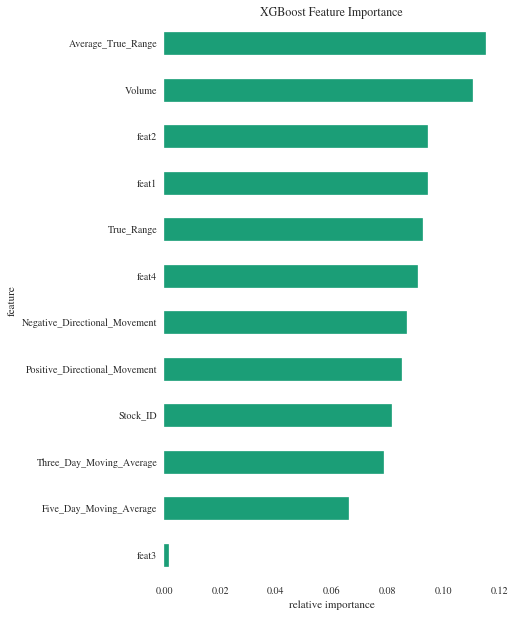

In [290]:
import operator

def create_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    for i, feat in enumerate(features):
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
    outfile.close()

create_feature_map(X_train.columns)
importance = gbm.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1))

df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

featp = df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
fig_featp = featp.get_figure()

In [177]:
# df_train['pos_comp'] = 0
# df_test['pos_comp'] = 0

In [178]:
# for ids in train['Stock_ID'].unique():
#     df_train['pos_comp'][df_train['Stock_ID']==ids] = df_train['Positive_Directional_Movement'][df_train['Stock_ID']==ids].shift(1)
#     df_test['pos_comp'][df_test['Stock_ID']==ids] = df_test['Positive_Directional_Movement'][df_test['Stock_ID']==ids].shift(1)

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [183]:
# df_train['feat3'] = 0
# df_train['feat3'][df_train['pos_comp']==df_train['Positive_Directional_Movement']] = 1

# df_test['feat3'] = 0
# df_test['feat3'][df_test['pos_comp']==df_test['Positive_Directional_Movement']] = 1

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [289]:
from collections import defaultdict, Counter
from glob import glob
import sys
import re

glob_files = 'sol*.csv'
loc_outfile = 'vote.csv'
weights_strategy = "uniform"
if len(sys.argv) == 4:
  weights_strategy = sys.argv[3]

def kaggle_bag(glob_files, loc_outfile, method="average", weights="uniform"):
  pattern = re.compile(r"(.)*_[w|W](\d*)_[.]*")
  if method == "average":
    scores = defaultdict(list)
  with open(loc_outfile,"wb") as outfile:
    #weight_list may be usefull using a different method
    weight_list = [1]*len(glob(glob_files))
    for i, glob_file in enumerate( glob(glob_files) ):
      print "parsing:", glob_file
      if weights == "weighted":
         weight = pattern.match(glob_file)
         if weight and weight.group(2):
            print "Using weight: ",int(weight.group(2))
            weight_list[i] = weight_list[i]*int(weight.group(2))
         else:
            print "Using weight: 1"
      # sort glob_file by first column, ignoring the first line
      lines = open(glob_file).readlines()
      lines = [lines[0]] + sorted(lines[1:])
      for e, line in enumerate( lines ):
        if i == 0 and e == 0:
          outfile.write(line)
        if e > 0:
          row = line.strip().split(",")
          for l in range(1,weight_list[i]+1):
            scores[(e,row[0])].append(row[1])
    for j,k in sorted(scores):
      outfile.write("%s,%s\n"%(k,Counter(scores[(j,k)]).most_common(1)[0][0]))
    print("wrote to %s"%loc_outfile)
    
kaggle_bag(glob_files, loc_outfile, weights=weights_strategy)

parsing: sol1.csv
parsing: sol10.csv
parsing: sol2.csv
parsing: sol3.csv
parsing: sol4.csv
parsing: sol5.csv
parsing: sol6.csv
parsing: sol7.csv
parsing: sol8.csv
parsing: sol9.csv
wrote to vote.csv
